# Exercise 4: Representations of data
# Task 1: Principal component analysis

### 1. In the ﬁrst part of this task, you are supposed to implement principal component analysis using a library method for singular value decomposition. Then, approximate the one-dimensional, linear subspace of the two-dimensional data set pca dataset.txt on Moodle that is optimal in the sense of variance reduction. How much energy is contained in each of the two components? Plot the data set as shown in the ﬁgure, and add the direction of the two principal components by drawingterse lines starting from the center of the data set.


Bad key "text.kerning_factor" on line 4 in
C:\Users\lishi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Shape: (100, 2)
Head:
[[ 1.62434536  0.76745983]
 [-0.61175641 -0.18342744]
 [-0.52817175 -0.22373671]
 [-1.07296862 -0.47712646]
 [ 0.86540763  0.32321263]
 [-2.3015387  -1.13383111]
 [ 1.74481176  0.94646153]
 [-0.7612069  -0.47597351]
 [ 0.3190391   0.1328977 ]
 [-0.24937038 -0.12142373]]


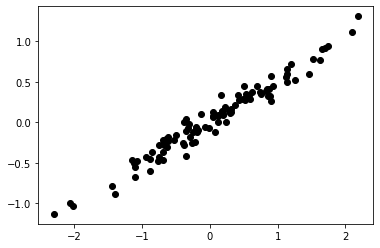

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
data = np.genfromtxt("pca_dataset.txt", dtype='double')
print(f"Shape: {data.shape}")
print(f"Head:\n{data[:10]}")
plt.plot(data[:,0], data[:,1], 'o', color='black');

[0.06058285 0.0455709 ]


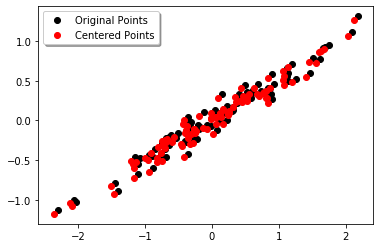

In [2]:
# Center the matrix by removing the data mean
means = np.mean(data, axis=0)
print(means)
centered_matrix = data - means
plt.plot(data[:,0], data[:,1], 'o', color='black');
plt.plot(centered_matrix[:,0], centered_matrix[:,1], 'o', color='red');
plt.legend(('Original Points', 'Centered Points'), loc='upper left', shadow=True)

PCA Components:
[[-0.88938337 -0.45716213]
 [ 0.45716213 -0.88938337]]
PCA Explained Variance:
[0.98871302 0.00682676]
PCA energy Ratios:
[0.99314266 0.00685734]


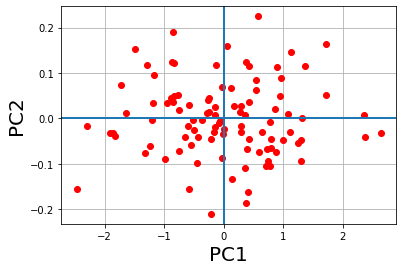

In [5]:
# USV decomposition and energy computation
U, S, Vt = linalg.svd(centered_matrix)

pca_matrix = centered_matrix.dot(Vt.T)
pca_components = Vt
pca_variance = np.var(pca_matrix, axis=0)
pca_variance_ratio = pca_variance / np.sum(pca_variance)

print(f"PCA Components:\n{pca_components}")
print(f"PCA Explained Variance:\n{pca_variance}")
print(f"PCA energy Ratios:\n{pca_variance_ratio}")

plt.plot(pca_matrix[:,0], pca_matrix[:,1], "ro")
plt.grid()
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.axvline(0, lw=2);
plt.axhline(0, lw=2)

[-2.65898617 -1.36677594]
[ 0.11357153 -0.22094706]


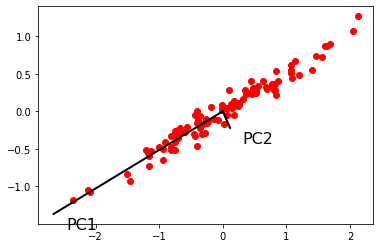

In [4]:
plt.plot(centered_matrix[:,0], centered_matrix[:,1], "ro"); 
count = 0
for length, vector in zip(pca_variance_ratio, pca_components):
    v = vector * 3 * np.sqrt(length)
    print(v)
    plt.plot([0,v[0]], [0,v[1]], "k", lw=2)
    plt.text(v[0]+0.2, v[1]-.2, "PC%s" % (count+1), fontsize=16)
    count += 1

### 2. For the second part, apply PCA to the image below. You can download the image on its original website, or generate it through the scipy.misc.face() command in Python. Note that this image is the spiritual successor to “Lena”, which was removed due to copyright issues. The columns of the image should be considered as the data points in the analysis. You have to convert the image to gray-scale before starting the analysis, e.g. by using scipy.misc.face(gray=True). You also should rescale the image to have size (249 × 185).

Shape: (768, 1024, 3)


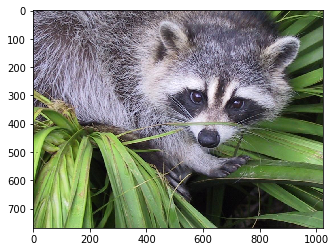

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import misc
import cv2
face = misc.face()
print(f"Shape: {face.shape}")
plt.imshow(face)

(768, 1024)


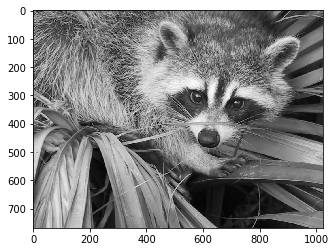

In [7]:
# convert to black and white
face_bw = misc.face(gray=True)
plt.imshow(face_bw, cmap='gray')
print(face_bw.shape)

(185, 249)


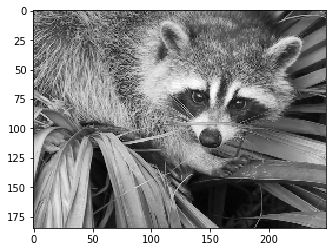

In [8]:
face_bw_resized = cv2.resize(face_bw,(249,185))
print(face_bw_resized.shape)
plt.imshow(face_bw_resized, cmap='gray')

Visualize reconstructions of the image with (a) all, (b) 120, (c) 50 and (d) 10 principal components. At what number is the information loss visible? To obtain a reconstruction with a certain number L of principal components, just set the singular values to zero that are smaller than the L-th singular value and then reconstruct using $\hat{X} = U\hat{S}V^T$ . At what number is the “energy” lost through truncation smaller than 1%?

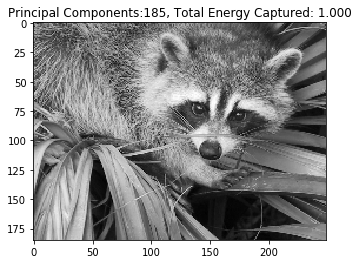

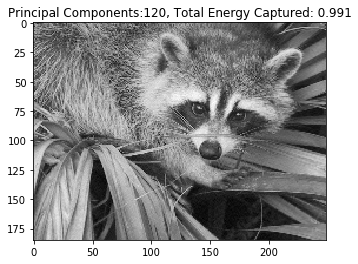

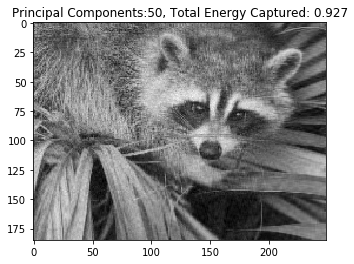

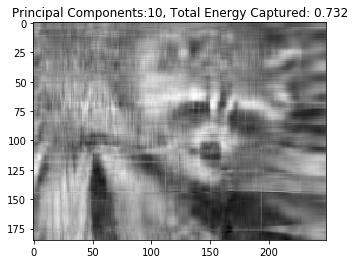

In [9]:
values = [185, 120, 50, 10]
for value in values:
    U, S, Vt = linalg.svd(face_bw_resized)

    U = U[:, 0:value]

    sigma = np.zeros((U.shape[1], Vt.shape[0]))
    for i in range(min(sigma.shape[0], sigma.shape[1])):
        sigma[i, i] = S[i]

    pca_matrix = face_bw_resized.dot(Vt.T)
    pca_components = Vt
    pca_variance = np.var(pca_matrix, axis=0)
    pca_variance_ratio = pca_variance / np.sum(pca_variance)

    reconstructed_img = np.dot(U, np.dot(sigma, Vt))
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title(f'Principal Components:{value}, Total Energy Captured: {np.sum(pca_variance_ratio[0:value]):.3f}')
    plt.show()

### 3.The third and last part of this task concerns the trajectory data in the ﬁle data DMAP PCA vadere.txt on Moodle. The ﬁle contains position data of 15 pedestrians over 1000 time steps (in the form x1, y1, x2, y2, . . . for the x, y positions of all pedestrians).
### (1) Visualize the path of the ﬁrst two pedestrians in the two-dimensional space. What do you observe?

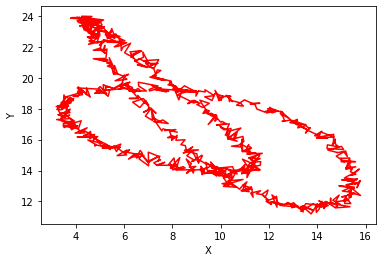

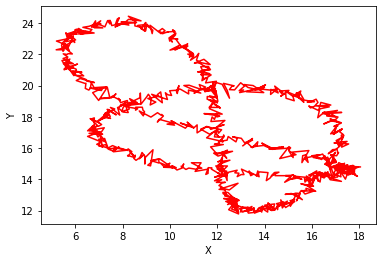

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
data = np.genfromtxt("data_DMAP_PCA_vadere.txt", dtype='double')
plt.plot(data[:,0], data[:,1], color='red');
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(data[:,2], data[:,3], color='red');
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### (2) Analyze the data set by projecting the 30-dimensional data points (one in each row of the ﬁle) to the ﬁrst two principal components. Discuss your ﬁndings, in particular: are two components enough to capture most of the energy (> 90%) of the data set? Why, or why not? How many do you need to capture most of the energy?

[ 8.69041656 17.18480439 11.83138656 17.46090772  5.97749744 13.98085094
  3.97491327 12.31694551  2.31034721 13.04555703  0.45787602 11.60150539
 15.94253783 14.96617203 13.68292236 16.51240386 11.55586342 14.77256557
  1.82325102  7.32666437  5.62951604 16.15697193  3.91610671  6.87614398
 13.83507357 18.60590247 13.25736928 18.8600689   4.56612049 17.65733972]


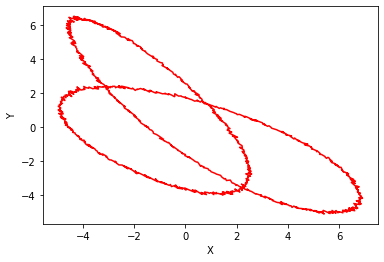

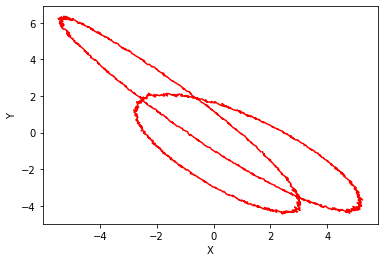

Explained Variance Ratio: [0.47330561 0.37594081]
Sum of Explained Variance ratios (Total Energy Captured): 0.8492464226063752


In [15]:
means = np.mean(data, axis=0)
print(means)
centered_matrix = data - means
def calculate_pca(pc_count):
    U, S, Vt = linalg.svd(centered_matrix)

    U = U[:, 0:pc_count]

    sigma = np.zeros((U.shape[1], Vt.shape[0]))
    for i in range(min(sigma.shape[0], sigma.shape[1])):
        sigma[i, i] = S[i]

    pca_matrix = centered_matrix.dot(Vt.T)
    pca_components = Vt
    pca_variance = np.var(pca_matrix, axis=0)
    pca_variance_ratio = pca_variance / np.sum(pca_variance)

    reconstructed_data= np.dot(U, np.dot(sigma, Vt))

    plt.plot(reconstructed_data[:,0], reconstructed_data[:,1], color='red');
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    plt.plot(reconstructed_data[:,2], reconstructed_data[:,3], color='red');
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    print(f"Explained Variance Ratio: {pca_variance_ratio[0:pc_count]}")
    print(f"Sum of Explained Variance ratios (Total Energy Captured): {np.sum(pca_variance_ratio[0:pc_count])}")
    
calculate_pca(2)

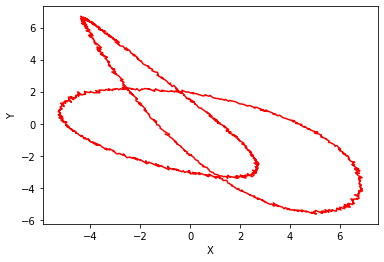

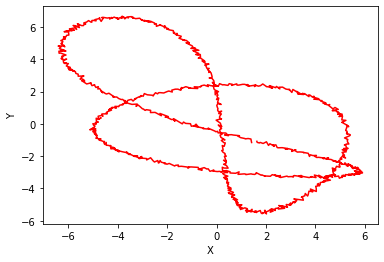

Explained Variance Ratio: [0.47330561 0.37594081 0.14788461]
Sum of Explained Variance ratios (Total Energy Captured): 0.9971310341299294


In [16]:
calculate_pca(3)